In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df= pd.read_csv('../data/external/complaints-2023-10-24_23_29.csv')

In [8]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,01/05/23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,I retrieved a copy of my credit report and imm...,None,"HW Holding, Inc",GA,30297,None,Consent provided,Web,01/05/23,Closed with explanation,Yes,NaN,6402405.0
1,12/27/21,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was result of identity theft,this message is for USAA. i reported to them t...,Company believes it acted appropriately as aut...,UNITED SERVICES AUTOMOBILE ASSOCIATION,NC,283XX,Servicemember,Consent provided,Web,12/27/21,Closed with explanation,Yes,NaN,5045906.0
2,04/19/21,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Problem with personal statement of dispute,"To whom it may concern, i was working on refin...",Company has responded to the consumer and the ...,TRUIST FINANCIAL CORPORATION,FL,33160,None,Consent provided,Web,04/19/21,Closed with explanation,Yes,NaN,4309183.0
3,07/04/23,Checking or savings account,Savings account,Managing an account,Deposits and withdrawals,During year XXXX I loaned funds from my person...,None,SAN DIEGO COUNTY CREDIT UNION,CA,92596,None,Consent provided,Web,07/06/23,Closed with explanation,Yes,NaN,7204114.0
4,07/20/23,Mortgage,Conventional home mortgage,Trouble during payment process,None,This is a response and continuation of complai...,None,"Fay Servicing, LLC",CA,92887,None,Consent provided,Web,07/20/23,Closed with explanation,Yes,NaN,7280737.0


In [10]:
df.shape

(1386068, 18)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386068 entries, 0 to 1386067
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Date received                 1386068 non-null  object 
 1   Product                       1386068 non-null  object 
 2   Sub-product                   1386068 non-null  object 
 3   Issue                         1386068 non-null  object 
 4   Sub-issue                     1386068 non-null  object 
 5   Consumer complaint narrative  1386067 non-null  object 
 6   Company public response       1386067 non-null  object 
 7   Company                       1386067 non-null  object 
 8   State                         1386067 non-null  object 
 9   ZIP code                      1386067 non-null  object 
 10  Tags                          1386067 non-null  object 
 11  Consumer consent provided?    1386067 non-null  object 
 12  Submitted via               

In [18]:
df.Product.unique()

array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Checking or savings account', 'Mortgage',
       'Credit card or prepaid card', 'Vehicle loan or lease',
       'Payday loan, title loan, or personal loan', 'Student loan',
       'Money transfer, virtual currency, or money service'], dtype=object)

In [25]:
df.Product.value_counts()

Credit reporting, credit repair services, or other personal consumer reports    778933
Debt collection                                                                 212471
Mortgage                                                                        104707
Credit card or prepaid card                                                     104620
Checking or savings account                                                      76053
Student loan                                                                     34719
Money transfer, virtual currency, or money service                               32716
Vehicle loan or lease                                                            25370
Payday loan, title loan, or personal loan                                        16479
Name: Product, dtype: int64

In [26]:
df.Product.describe().T

count                                               1386068
unique                                                    9
top       Credit reporting, credit repair services, or o...
freq                                                 778933
Name: Product, dtype: object

In [27]:
def DiagrammeBaton(df,vars):
    #k=len(vars)
    fig = plt.figure(figsize=(15,20))
    #_,axes = plt.subplots(1, k, sharey=True, figsize=(40,10))
    c=1
    for m in vars:
        plt.subplot(5, 2, c)
        sns.set_theme(style="whitegrid", palette="pastel",font_scale=1)
        sns.countplot(y = df[m], order = df[m].value_counts().index)
        c=c+1

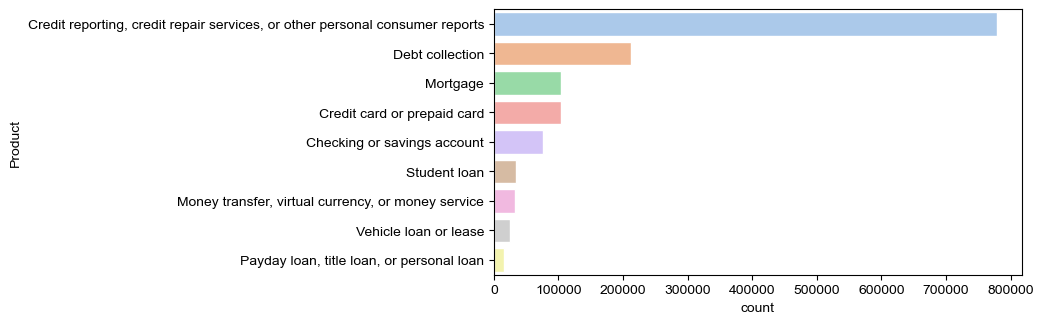

In [28]:
DiagrammeBaton(df,['Product'])

In [31]:
def DiagrammeCirculaire(df,vars):    
    #fig = plt.figure(figsize=(15,20))
    #_,axes = plt.subplots(1, k, sharey=True, figsize=(40,10))
    i=441
    for x in vars:
        df1_effectif=df[x].value_counts()
        j=len(df[x].unique())
        explode = [0.03]*j
        df1_effectif.plot(kind="pie",stacked=True, figsize=(10,8), shadow=True, autopct='%1.1f%%', explode=explode)
        plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
        plt.show()

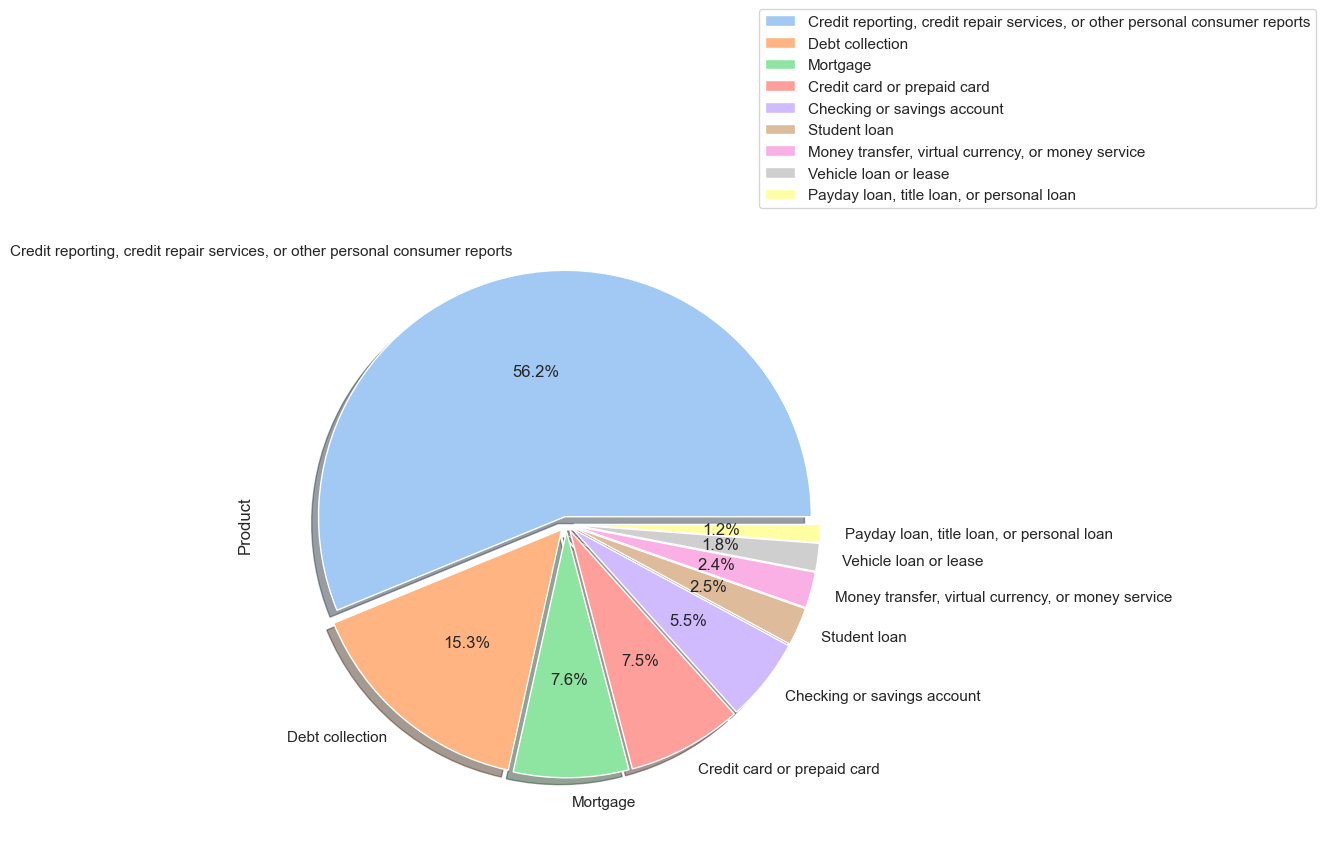

In [32]:
DiagrammeCirculaire(df,['Product'])

In [33]:
df.Issue.value_counts()

Incorrect information on your report                                                347607
Problem with a credit reporting company's investigation into an existing problem    242742
Improper use of your report                                                         178983
Attempts to collect debt not owed                                                    83793
Managing an account                                                                  42113
                                                                                     ...  
Problem with a company's investigation into an existing problem                         12
Property was damaged or destroyed property                                               6
Property was sold                                                                        5
Trouble accessing funds in your mobile or digital wallet                                 3
Problem with an overdraft                                                                3

In [34]:
df.Issue.describe().T

count                                  1386068
unique                                      95
top       Incorrect information on your report
freq                                    347607
Name: Issue, dtype: object

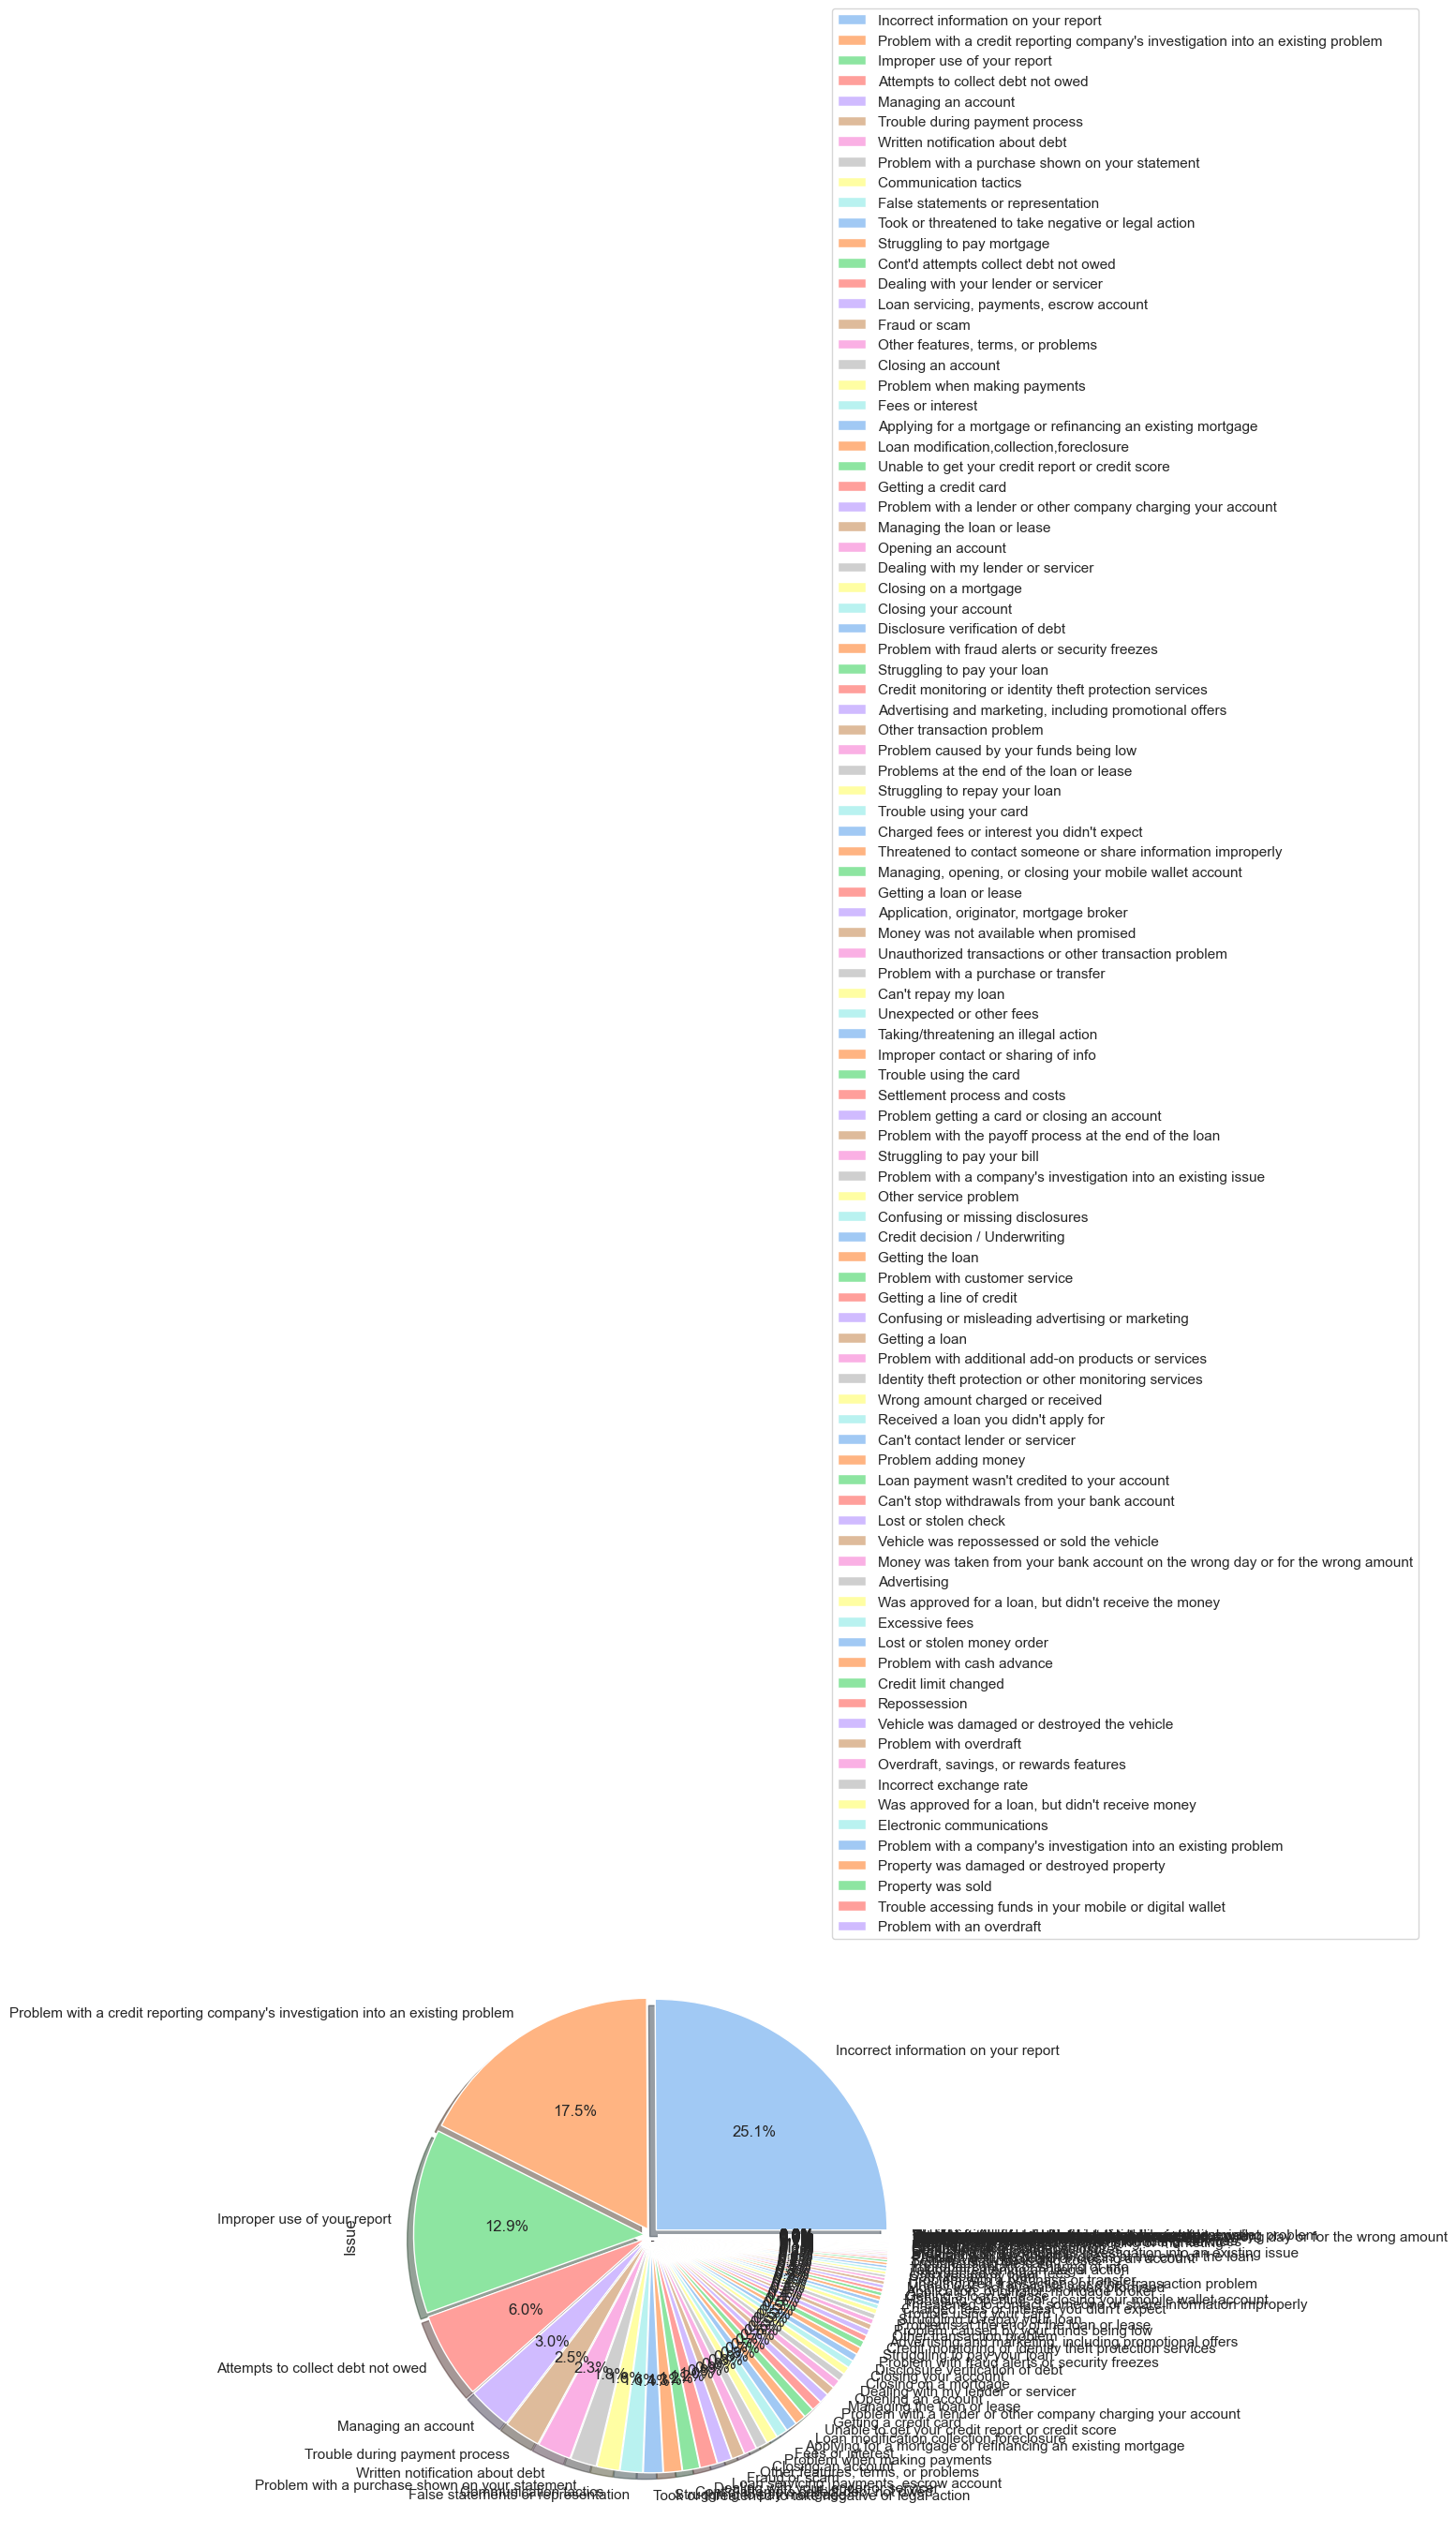

In [35]:
DiagrammeCirculaire(df,['Issue'])

In [38]:
df["Consumer complaint narrative"].iloc[2]

"To whom it may concern, i was working on refinancing my loan back in XXXX and XX/XX/XXXX, my refinance was finalized in XX/XX/XXXX and my mortgage for 2 properties were paid off in XX/XX/XXXX. Originally, the refinance was supposed to be finalized in XX/XX/XXXX but was delayed 1 month. I made my mortgage payments for both loans for XXXX as soon as I found out that the closing is not happening until XX/XX/XXXX. I paid both mortgages from the same back account on XX/XX/XXXX. Both payments went through and I received a confirmation. only to find out on XX/XX/XXXX that my payment to Suntrust  was returned, I called Suntrust and they couldn't find the issue so they submitted a new request and the payment went through. I don't understand how the payment for 1 mortgage went through but not the other. I had over $ XXXX in the account I paid from. Both accounts were paid off on XX/XX/XXXX. I don't think it is fair for me that my credit score is ruined by over XXXX points because of this mistak

In [41]:
7*4

28